# G2M insight for Cab Investment firm
## case study on 4 individual data sets
### 1. preparation

In [1]:
#import package and data
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cab_Data = pd.read_csv('./Data/Cab_Data.csv')
Customer_ID =  pd.read_csv("./Data/Customer_ID.csv")
Transaction_ID = pd.read_csv("./Data/Transaction_ID.csv")
City = pd.read_csv("./Data/City.csv")

In [2]:
# show basic information
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

#### information above is enough for data intake report

### with data base knowledge, I found connection between those relations
### Cab_data can merge with City by City,
### Cab_data can merge with Transaction_ID by transaction id,
### and Transaction_ID can merge with Customer_ID by customer id

In [3]:
# Here we merge all data into one dataframe
merged_df = Cab_Data.merge(City, on = 'City').merge(Transaction_ID, on= 'Transaction ID').merge(Customer_ID, on ='Customer ID')
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 32.9+ MB


In [5]:
# check null value
print("number of null data: {}".format(merged_df.isnull().sum()))

number of null data: Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


### 2. investigate the data set

In [6]:
corr = merged_df.corr()
corr

C:\Users\23566\AppData\Local\Temp/ipykernel_18020/712612077.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484,-0.017653,-0.001346,-0.001368
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,-0.017653,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.001346,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.001368,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


C:\Users\23566\AppData\Local\Temp/ipykernel_18020/3214239663.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(merged_df.corr(), fignum=f.number)


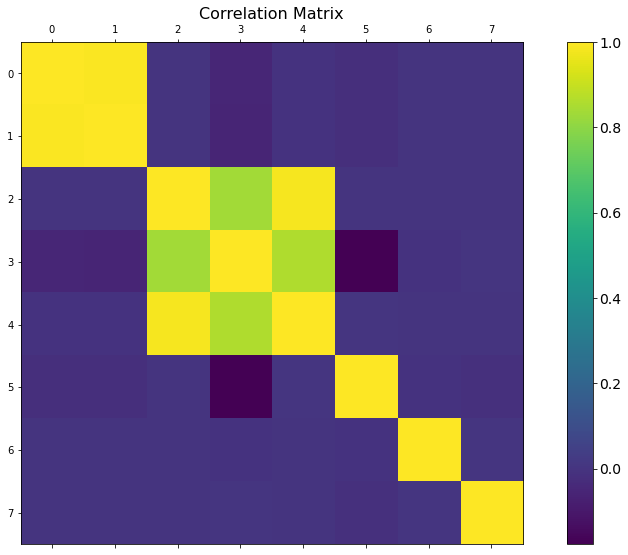

In [7]:
f = plt.figure(figsize=(16, 9))
plt.matshow(merged_df.corr(), fignum=f.number)
plt.title('Correlation Matrix', fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

C:\Users\23566\AppData\Local\Temp/ipykernel_18020/2691473918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_df.corr()


<AxesSubplot: >

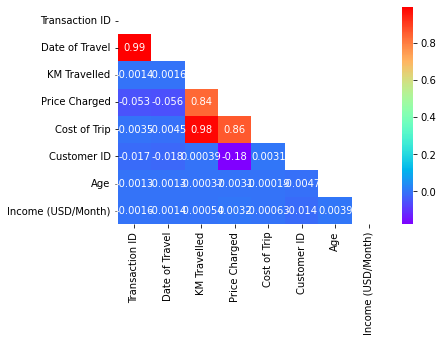

In [8]:
corr = merged_df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, 
            mask = matrix,
            cmap = 'rainbow', annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Now four groups of correlation reveal themselves:
1. Date of travel v.s. Transaction ID
2. Price charged v.s. KM Travelled
3. Cost of Trip v.s. KM Travelled
4. Cost of trip v.s. Price charged
The 2, 3, 4 correlations are a group among which as every category is strongly correlated to each other.
Therefore, I summarize two findings from the correlation investigation:
#### Date of travel v.s. Transaction ID
#### Price charged v.s. KM Travelled v.s. Cost of Trip

### 3. EDA and Data transformation
#### 3.1 company

In [9]:
from pandas.api.types import is_numeric_dtype
is_numeric_dtype(merged_df['Users'])

False

In [10]:
# ensure numeric
company = merged_df
company['Company'].replace(['Pink Cab', 'Yellow Cab'],
                        [0, 1], inplace=True)
# delete spaces and , in company strings
company['Users'] = pd.to_numeric(company['Users'].str.strip().str.replace(',', '').astype(float))

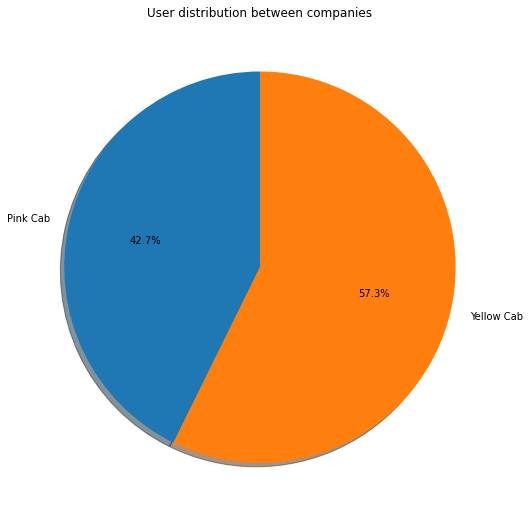

In [11]:
# plot
user = company.groupby('Company').Users
user = user.mean()
figp, axp = plt.subplots(figsize=(16,9))
axp.pie(user.values , labels=['Pink Cab', 'Yellow Cab'], autopct='%1.1f%%',shadow=True, startangle=90,)
plt.title('User distribution between companies')
plt.show()

As we can see here, Yellow Cab has more users than Pink Cab does.

#### 3.2 distance travelled

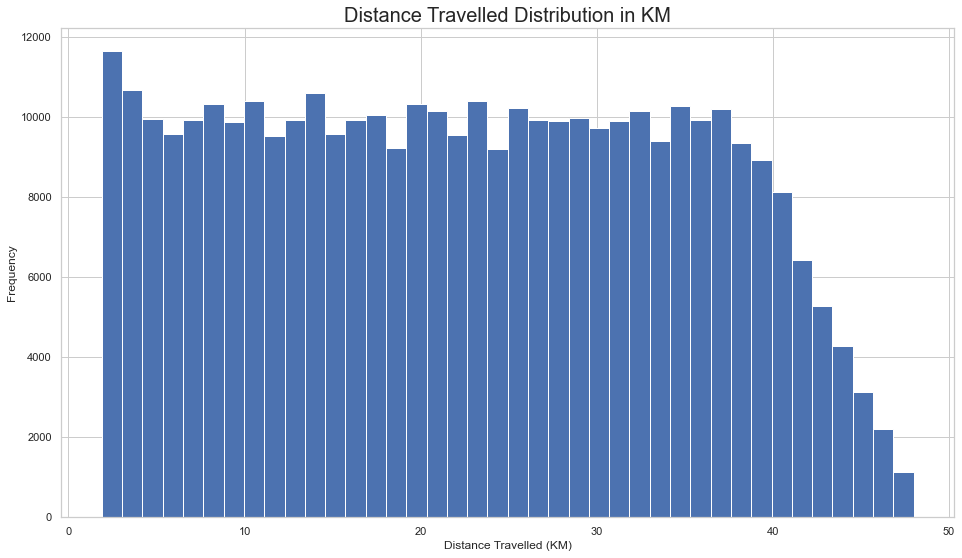

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize = (16, 9))
plt.hist(merged_df['KM Travelled'], bins = 40)
plt.title('Distance Travelled Distribution in KM', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Distance Travelled (KM)')
plt.show()

As we can see here, most people have travelled between 2km and 40km, and we have a decreasing number of users with increasing distance travelled with over 40 km distance travelled.

#### 3.3 gender

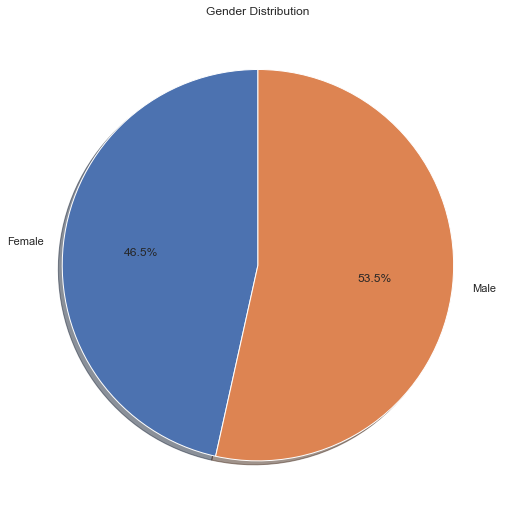

In [13]:
gender_df = merged_df.groupby('Gender')
gender_df = gender_df['Customer ID'].nunique()
#print(gender_df)
figp, axp = plt.subplots(figsize=(16,9))
axp.pie(gender_df.values , labels=gender_df.index, autopct='%1.1f%%',shadow=True, startangle=90,)
plt.title('Gender Distribution')
plt.show()

As we can see in the pie graph, there are close percentage of male and female users based on the user pool of both companies. Here we can also investigate with the user pool separated.

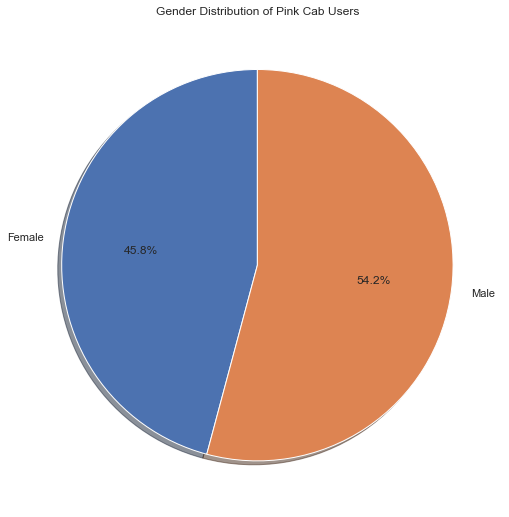

In [14]:
pink_df = merged_df[(merged_df.Company==0)].groupby('Gender')
pink_df = pink_df['Customer ID'].nunique()
figp, axp = plt.subplots(figsize=(16,9))
axp.pie(pink_df.values , labels=pink_df.index, autopct='%1.1f%%',shadow=True, startangle=90,)
plt.title('Gender Distribution of Pink Cab Users')
plt.show()

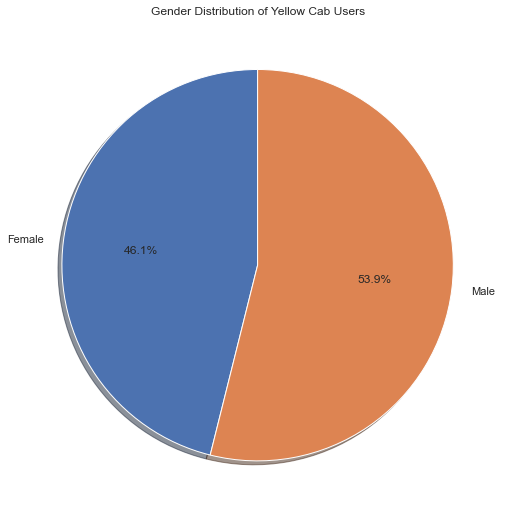

In [15]:
yellow_df = merged_df[(merged_df.Company==1)].groupby('Gender')
yellow_df = yellow_df['Customer ID'].nunique()
figp, axp = plt.subplots(figsize=(16,9))
axp.pie(yellow_df.values , labels=yellow_df.index, autopct='%1.1f%%',shadow=True, startangle=90,)
plt.title('Gender Distribution of Yellow Cab Users')
plt.show()

As we can see, the gender distributions are similar for both companies.

#### 3.4 payment type

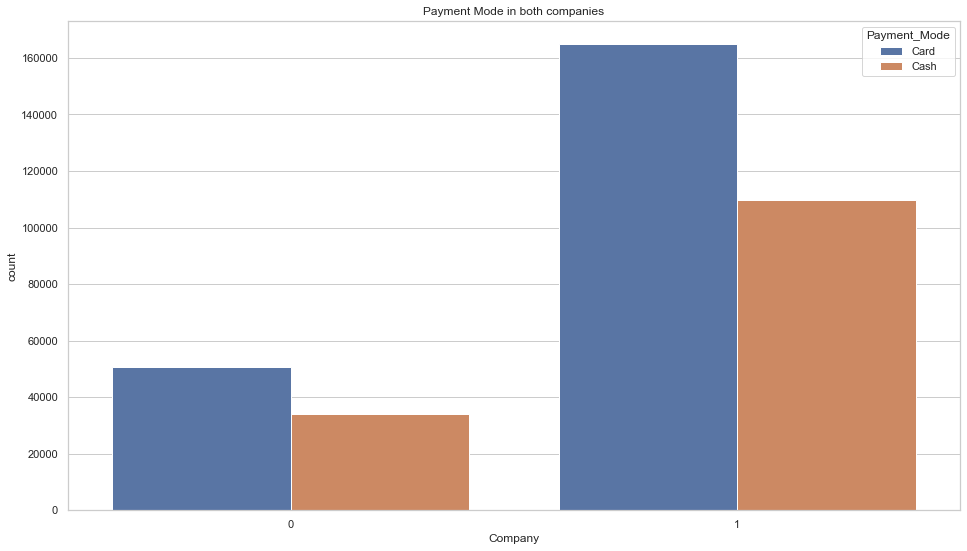

In [16]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=merged_df)
plt.title('Payment Mode in both companies')
plt.show()

Users prefer to pay with card than cash for both companies.

#### 3.5 age

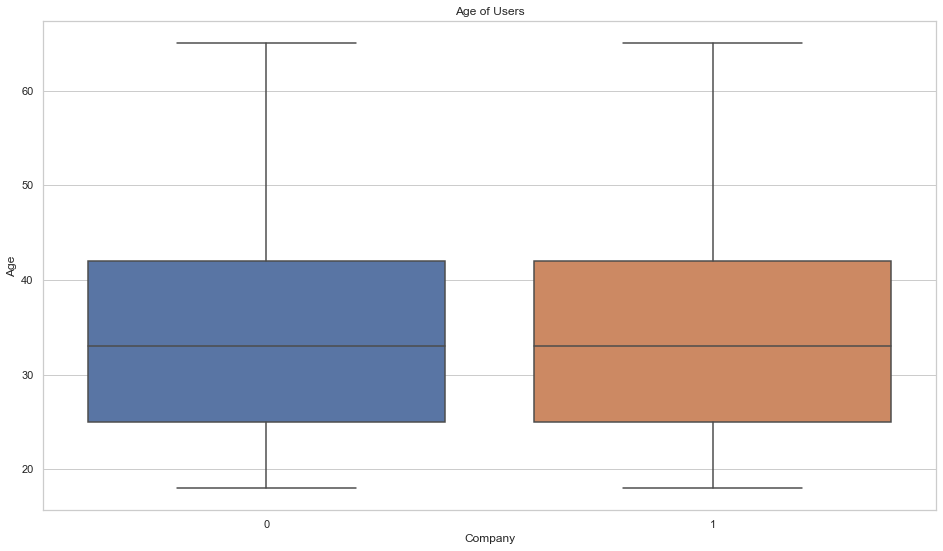

In [17]:
sns.set(style = 'whitegrid') 
plt.figure(figsize = (16, 9))
sns.boxplot(x=merged_df['Company'], y=merged_df['Age'], data=merged_df)
plt.title('Age of Users')
plt.show()

The distribution of user ages are similar for both companies with a range from under 20 to over 60 and an average of around 35.

#### 3.6 price

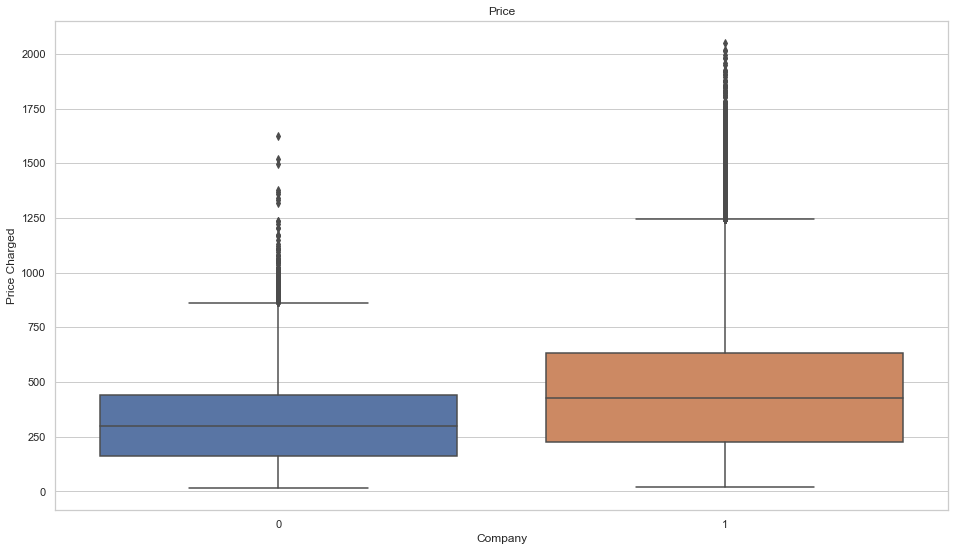

In [18]:
sns.set(style = 'whitegrid') 
plt.figure(figsize = (16, 9))
sns.boxplot(x=merged_df['Company'], y=merged_df['Price Charged'], data=merged_df)
plt.title('Price')
plt.show()

Yellow Cab has an apparently higher prices than Pink Cab does.

#### 3.7 cities

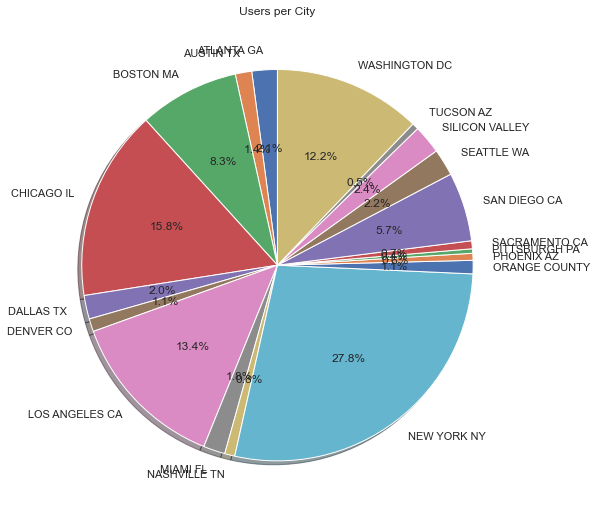

In [19]:
city_df = merged_df.groupby('City')
city_df = city_df.Users.count()
figp, axp = plt.subplots(figsize=(16,9))
axp.pie(city_df.values , labels=city_df.index, autopct='%1.1f%%',shadow=True, startangle=90,)

plt.title('Users per City')
plt.show()

The most users come from New York city, Chicago, Los Angeles, and Washington DC.

##### 3.x transform data by adding profit column
The most obvious and important transformation on the dataset should be the profit of each travel. It would be essential for XYZ to estimate overall profits by gaining information of the profits of individual travels.

In [20]:
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit
0,10000011,42377,0,ATLANTA GA,30.45,370.95,313.6350,"814,885",24701.0,29290,Card,Male,28,10813,57.3150
1,10351127,43302,1,ATLANTA GA,26.19,598.70,317.4228,"814,885",24701.0,29290,Cash,Male,28,10813,281.2772
2,10412921,43427,1,ATLANTA GA,42.55,792.05,597.4020,"814,885",24701.0,29290,Card,Male,28,10813,194.6480
3,10000012,42375,0,ATLANTA GA,28.62,358.52,334.8540,"814,885",24701.0,27703,Card,Male,27,9237,23.6660
4,10320494,43211,1,ATLANTA GA,36.38,721.10,467.1192,"814,885",24701.0,27703,Card,Male,27,9237,253.9808


### 4. Hypothesis

In [21]:
from scipy import stats
def hypothesis_test(dataA, dataB):
    _, p_value = stats.ttest_ind(dataA.values, dataB.values, equal_var=True)
    print('P value is ', p_value)
    if(p_value<0.05):
        print('We accept alternative hypothesis (H1)')
    else:
        print('We accept null hypothesis (H0)')

ModuleNotFoundError: No module named 'scipy'

#### 4.1 Hypothesis1: will the profits be different for different genders?
##### H0: The profits will not be different for genders.
##### H1: The profits will be different for genders.

In [ ]:
dataA = merged_df[(merged_df.Gender=='Male')].groupby('Transaction ID').Profit.mean()
#dataA_ = merged_df[(merged_df.Gender=='Male')].groupby('Transaction ID').Profit.mean()
#dataA__ = merged_df[(merged_df.Gender=='Male')&(merged_df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
#print(dataA.shape[0], dataA_.shape[0], dataA__.shape[0])
dataB= merged_df[(merged_df.Gender=='Female')].groupby('Transaction ID').Profit.mean()
hypothesis_test(dataA, dataB)

We can see that the profits are indeed different for two genders. Is it because both firms employ different price strategies for different genders, or is one company's strategy dominating the result?
#### 4.1.1 Will the test results for hypotheses 1 be different for two cab companies?
Test on Yellow Cab

In [ ]:
dataA = merged_df[(merged_df.Gender=='Male')&(merged_df.Company==1)].groupby('Transaction ID').Profit.mean()
dataB = merged_df[(merged_df.Gender=='Female')&(merged_df.Company==1)].groupby('Transaction ID').Profit.mean()
hypothesis_test(dataA, dataB)
# print(dataA.shape[0],dataB.shape[0])

The profits earned by yellow cab are different for two genders.
Now test on Pink Cab

In [ ]:
dataA = merged_df[(merged_df.Gender=='Male')&(merged_df.Company==0)].groupby('Transaction ID').Profit.mean()
dataB = merged_df[(merged_df.Gender=='Female')&(merged_df.Company==0)].groupby('Transaction ID').Profit.mean()
hypothesis_test(dataA, dataB)

The profits earned by yellow cab are not significantly different for two genders. 
#### Through 4.1, we found out different strategies of two companies on different genders.
####
#### 4.2 Hypothesis2: will the profits be different for different payment modes?
##### H0: The profits will not be different for payment modes.
##### H1: The profits will be different for payment modes.

In [ ]:
dataA = merged_df[(merged_df.Payment_Mode=='Card')].groupby('Transaction ID').Profit.mean()
dataB= merged_df[(merged_df.Payment_Mode=='Cash')].groupby('Transaction ID').Profit.mean()
hypothesis_test(dataA, dataB)

We can see that the profits are not significantly different for two payment modes.